In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df_all_data = pd.read_excel(r"C:\Users\stphn\Documents\CCT\Assessment\PEA25_estimated_population.xlsx", sheet_name="Unpivoted")


In [3]:
# Drop rows to leave data for one year only (2006) and save to variable
df_2023_data = df_all_data.drop(range(0,306))
df_2023_data # print to check for integrity - each year has 18 rows

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
306,Estimated Population,2023,Both sexes,All Countries,Thousand,5281.6
307,Estimated Population,2023,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,98.7
308,Estimated Population,2023,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,243.2
309,Estimated Population,2023,Both sexes,United Kingdom,Thousand,88.1
310,Estimated Population,2023,Both sexes,Ireland,Thousand,4524.6
311,Estimated Population,2023,Both sexes,"All countries excluding Ireland,United Kingdom...",Thousand,327.0
312,Estimated Population,2023,Male,All Countries,Thousand,2606.2
313,Estimated Population,2023,Male,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,48.7
314,Estimated Population,2023,Male,EU15 to EU27 (accession countries joined post ...,Thousand,120.6
315,Estimated Population,2023,Male,United Kingdom,Thousand,47.5


In [4]:
# df_all_data may have too many rows to print to screen for analysis. 
# Instead, some checks can be run to insure data integrity is maintained
df_all_data.head(5) # prints first five rows of data to screen
#df_all_data.tail(5) # prints last five rows of data to screen

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4


In [5]:
# A quicker way is to run a command that will count the rows and columns for us
# There are 18 rows per year and 18 years’ worth of collected data
# 18 * 18 = 324
# We can also see from the previous .tail(5) command that there are 6 columns, there has been no loss of data
df_all_data.shape

(324, 6)

In [6]:
# Print the data types so we know what we are working with. 
# Strings (text) are objects
# int64 are integers - whole numbers
# float64 are floats - numbers with a decimal point
df_all_data.dtypes

Statistic Label     object
Year                 int64
Sex                 object
Citizenship         object
UNIT                object
VALUE              float64
dtype: object

In [7]:
# Two columns can be dropped as they do not give any value to further calculations
df_all_data = df_all_data.drop(["Statistic Label", "UNIT"], axis=1)
df_all_data.head(5) # Print first five rows to ensure the correct columns were dropped

,Year,Sex,Citizenship,VALUE
0,2006,Both sexes,All Countries,4232.9
1,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,43.8
2,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,132.5
3,2006,Both sexes,United Kingdom,115.5
4,2006,Both sexes,Ireland,3802.4


In [8]:
# One column can be renamed. This is not essential but can be done to demonstrate how to do it
# It also removes opportunity for immature jokes to be made
df_all_data = df_all_data.rename(columns={"Sex": "Gender"})
df_all_data.head(5) # Print first five rows to ensure the correct columns has been renamed

,Year,Gender,Citizenship,VALUE
0,2006,Both sexes,All Countries,4232.9
1,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,43.8
2,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,132.5
3,2006,Both sexes,United Kingdom,115.5
4,2006,Both sexes,Ireland,3802.4


In [9]:
# Run a check for duplicate rows to promote data consistency and improve the reliability of the data
duplicate_rows_df = df_all_data[df_all_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape) # Print the number of duplicate rows.
# (0, 4) means 0 duplicate rows and four columns, we only ran a check for duplicate rows
# The dataset is small enough that we at a glance can see there are no duplicate columns

number of duplicate rows:  (0, 4)


In [10]:
# Two rows were dropped so, there should only be Four columns remaining with 324 rows of data per column
# Count the rows before dropping duplicate values so, it be compared with the result count after dropping duplicate values
# Original count = New count + number of dropped rows
df_all_data.count() 

Year           324
Gender         324
Citizenship    324
VALUE          324
dtype: int64

In [11]:
# Already know there are no duplicate rows but here is the code to drop duplicate rows
# Running the code will not harm the integrity of the dataset even though there are no duplicate rows
df_all_data = df_all_data.drop_duplicates()
df_all_data.count()

Year           324
Gender         324
Citizenship    324
VALUE          324
dtype: int64

In [12]:
# Here we call the isnull() function and sum it's results 
# The isnull() function will detect missing values in the dataset
print(df_all_data.isnull().sum())

Year           0
Gender         0
Citizenship    0
VALUE          0
dtype: int64


In [13]:
# Already know there are no null values but here is the code to drop null values
# Running the code will not harm the integrity of the dataset even though there are no null values
df_all_data = df_all_data.dropna() 

# The dropna() method removes all rows that contain null values
# There are no null values in the dataset so the returned value should be 324
df_all_data.count() 

Year           324
Gender         324
Citizenship    324
VALUE          324
dtype: int64

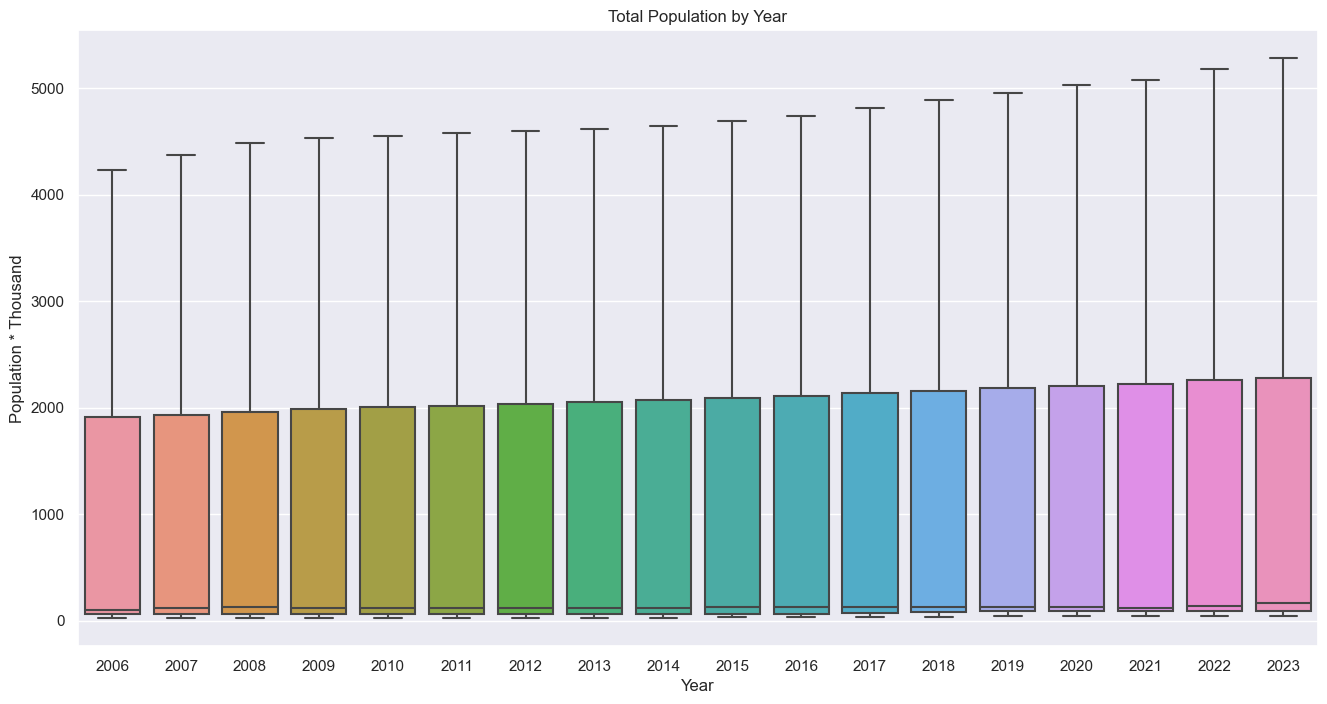

In [14]:
# The seaborn boxplot is a very basic plot. Boxplots are used to visualize distributions.
sns.set(rc={'figure.figsize':(16,8)}) # Adjust the figure size so the labels are clear and do not overlap
sns.boxplot( x=df_all_data["Year"], y=df_all_data["VALUE"] );
plt.xlabel("Year")
plt.ylabel("Population * Thousand")
plt.title("Total Population by Year")
plt.show()

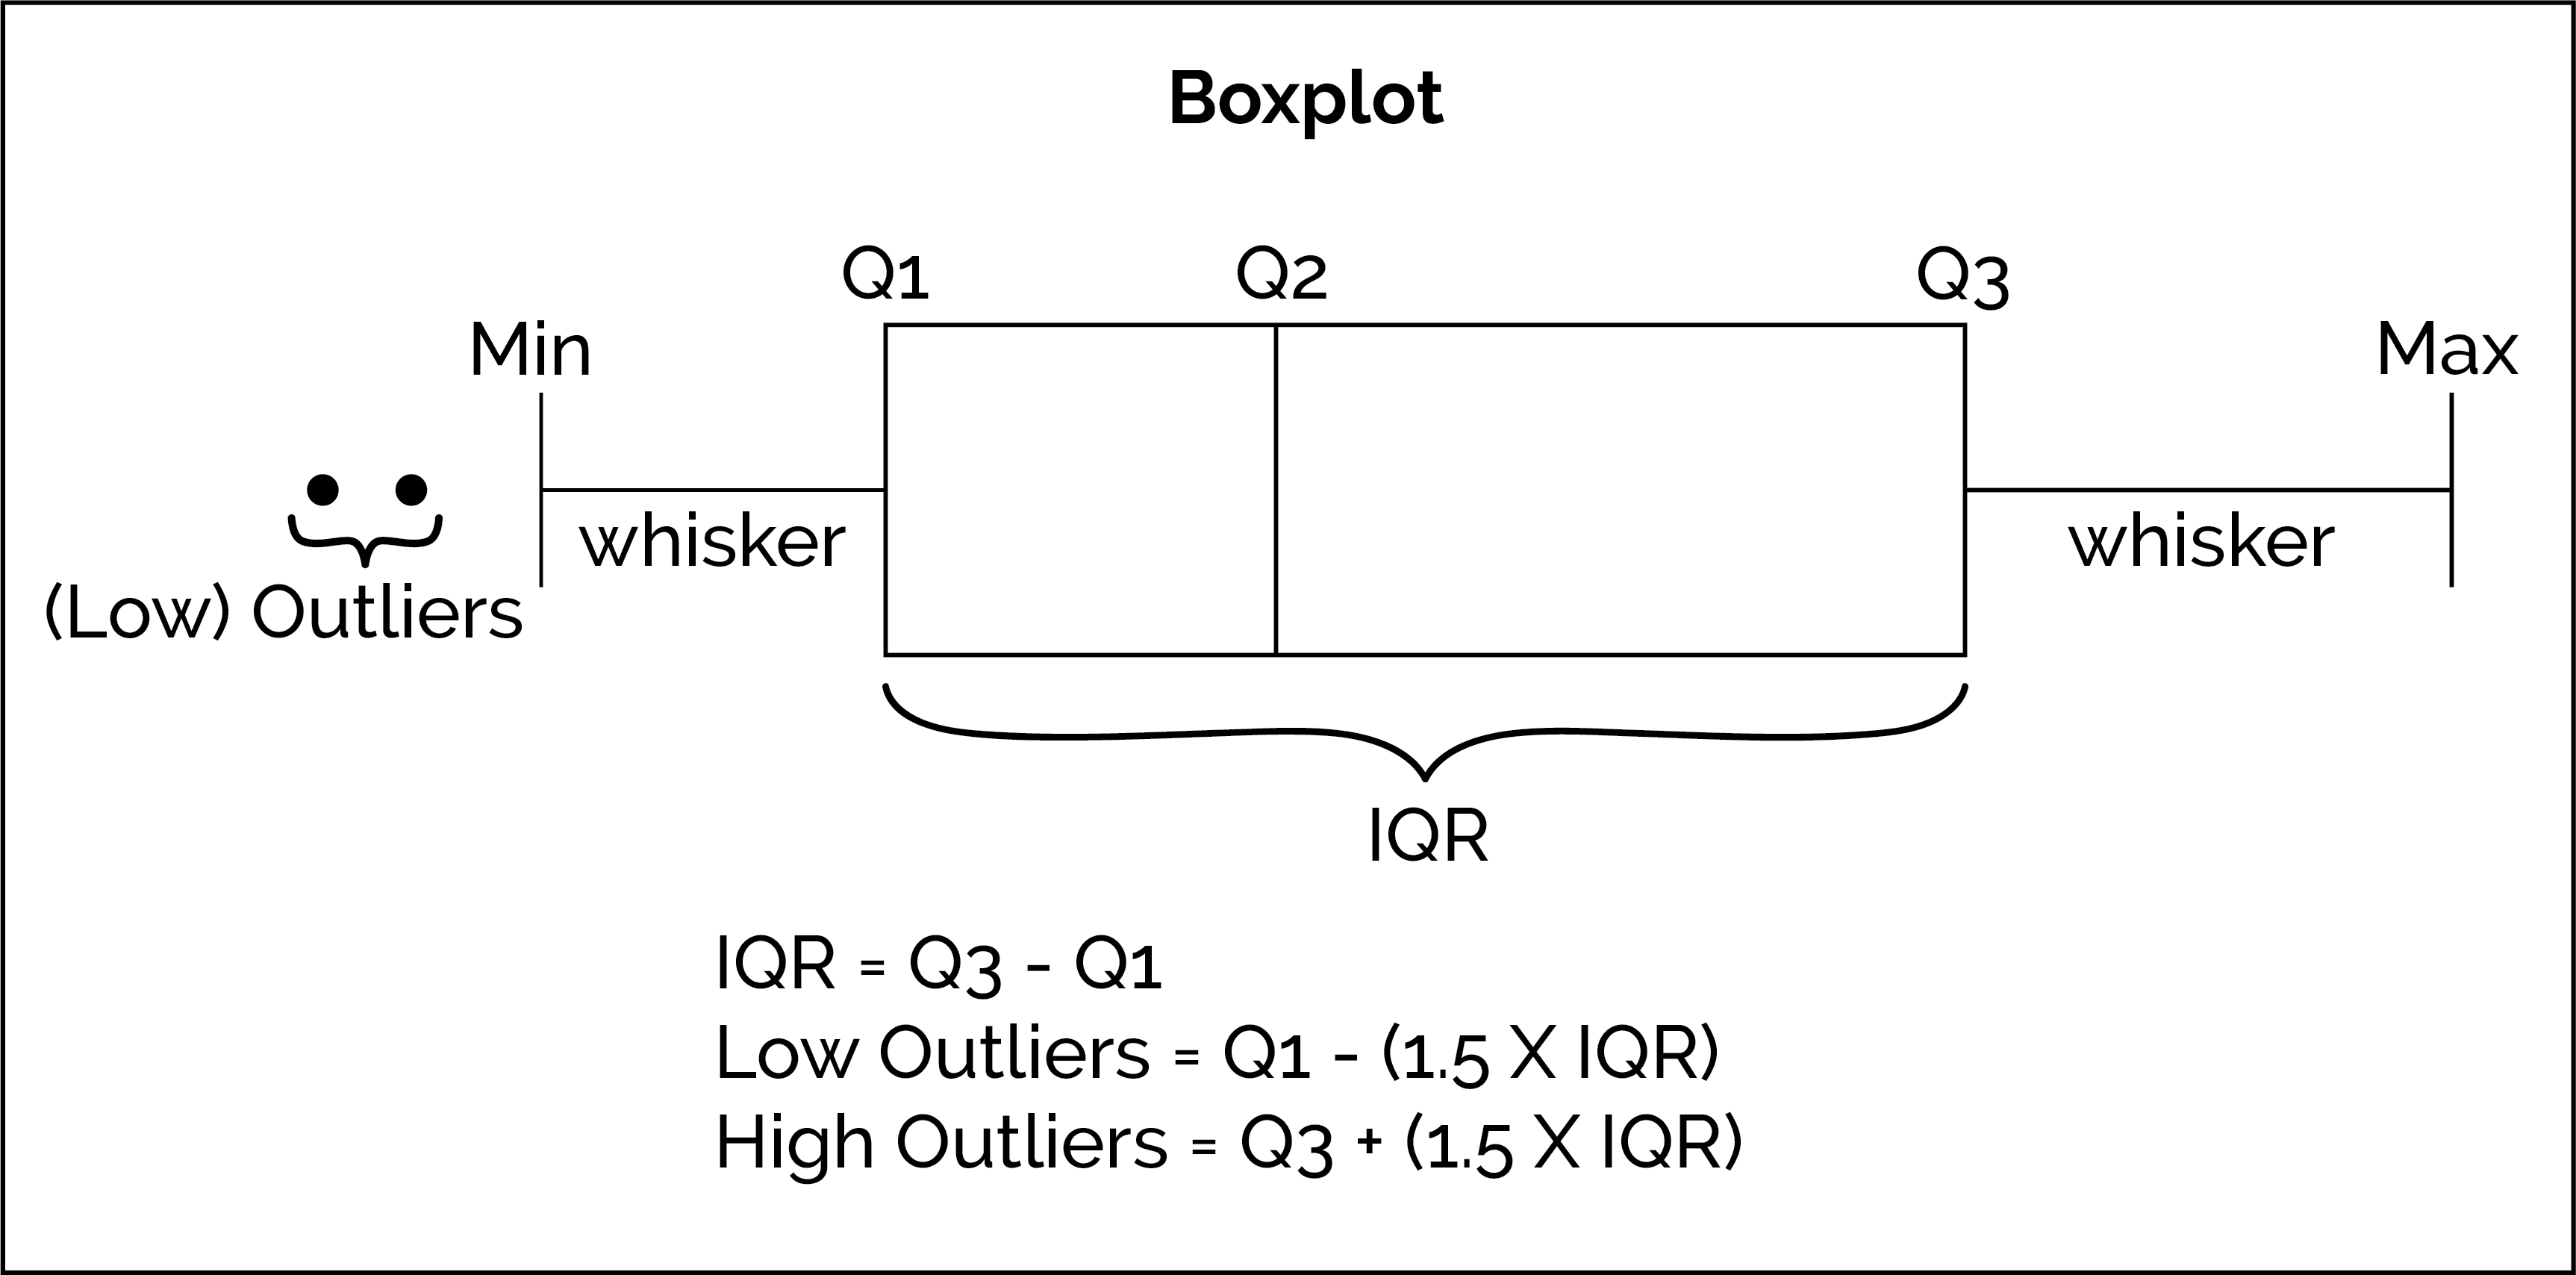

In [15]:
from IPython.display import Image
Image(filename =r'Boxplot-WebG.png', width = 600, height = 300)

# Box plots show the interquartile range (commonly called the IQR), a measure of the spread of the data. 

In [16]:
df_all_data.tail()
df_all_data.shape
df_all_data

,Year,Gender,Citizenship,VALUE
0,2006,Both sexes,All Countries,4232.9
1,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,43.8
2,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,132.5
3,2006,Both sexes,United Kingdom,115.5
4,2006,Both sexes,Ireland,3802.4
...,...,...,...,...
319,2023,Female,EU14 excl Irl (countries in the EU pre 2004 ex...,50.0
320,2023,Female,EU15 to EU27 (accession countries joined post ...,122.6
321,2023,Female,United Kingdom,40.5
322,2023,Female,Ireland,2287.5


In [17]:
# drop text values to remove error warning 
# save the numeric values to a new variable as text values will be needed to identify what rows to pull values from for charts
df_just_values = df_all_data.drop(["Gender", "Citizenship"], axis=1)
df_just_values.head()

,Year,VALUE
0,2006,4232.9
1,2006,43.8
2,2006,132.5
3,2006,115.5
4,2006,3802.4


In [18]:
# The IQR is the value of Q3 - Q1. The IQR tells us the range of the middle 50% of the data.
Q1 = df_just_values.quantile(0.25)
Q3 = df_just_values.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year        9.000
VALUE    2086.425
dtype: float64


In [19]:
#df_just_values.tail()
df_just_values.shape # (324, 2)

(324, 2)

In [20]:
# The program will use these values to remove our outliers. It's just important to know how to use this technique.
#df_just_values = df_just_values[~((df_just_values < (Q1-1.5 * IQR)) |(df_just_values > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_just_values.shape # (323, 2)
#df_just_values.tail()

In [21]:
# had outliers been removed the below count would differ from the above count
# one outlier would be removed using the code above but this is not needed as 
# the data with the CSO spreadsheet is accurate with no value dwarfing others
#df_just_values.head()
#df_just_values.tail()
df_just_values.shape # (324, 2)

(324, 2)

Text(0.5, 1.0, 'Total Populations For Each Gender by Year')

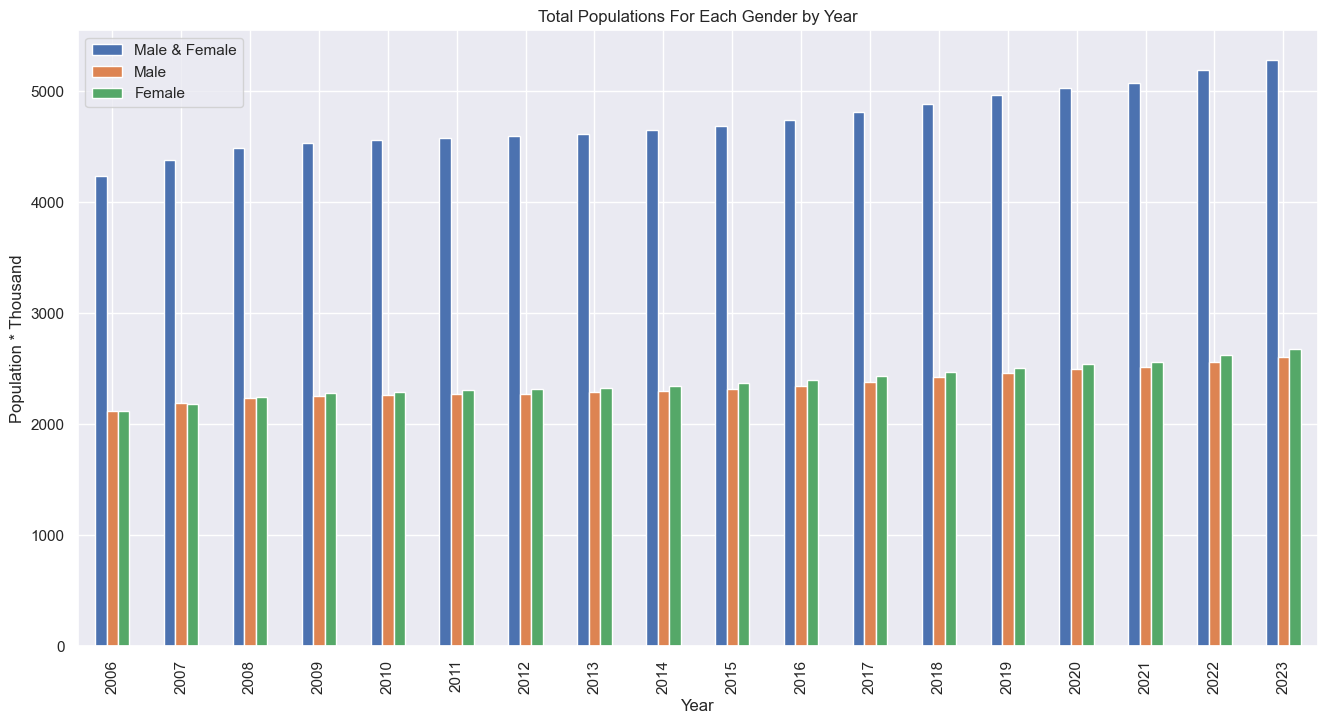

In [22]:
totals_by_year = df_all_data[((df_all_data['Gender'] == "Both sexes") & (df_all_data['Citizenship'] == "All Countries"))]
totals_by_year = totals_by_year.drop(["Year", "Gender", "Citizenship"], axis=1)
totals_by_year = totals_by_year.to_numpy()
totals_by_year = totals_by_year.flatten()

male_totals_by_year = df_all_data[((df_all_data['Gender'] == "Male") & (df_all_data['Citizenship'] == "All Countries"))]
male_totals_by_year = male_totals_by_year.drop(["Year", "Gender", "Citizenship"], axis=1)
male_totals_by_year = male_totals_by_year.to_numpy()
male_totals_by_year = male_totals_by_year.flatten()

female_totals_by_year = df_all_data[((df_all_data['Gender'] == "Female") & (df_all_data['Citizenship'] == "All Countries"))]
female_totals_by_year = female_totals_by_year.drop(["Year", "Gender", "Citizenship"], axis=1)
female_totals_by_year = female_totals_by_year.to_numpy()
female_totals_by_year = female_totals_by_year.flatten()


# Create a sample dataframe with an text index
plotdata = pd.DataFrame({
    "Male & Female":totals_by_year,
    "Male":male_totals_by_year,
    "Female":female_totals_by_year
    }, 
    index = df_all_data.Year.unique()
)
plotdata.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Population * Thousand")
plt.title("Total Populations For Each Gender by Year")

Text(0.5, 1.0, 'Population Growth by Region & Gender - 2023')

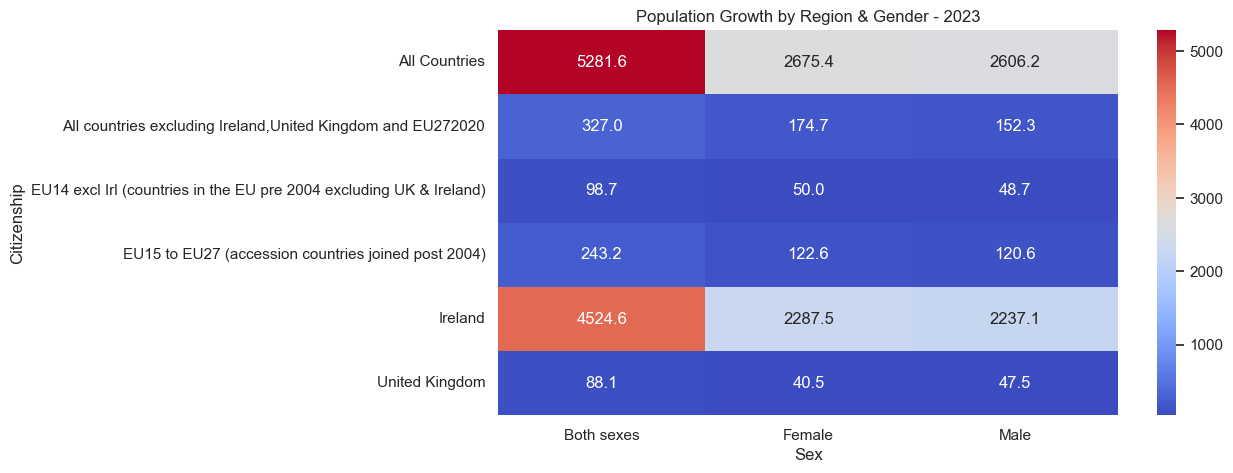

In [23]:
#plt.figure(figsize=(20,10))
#c= df.corr()
#sns.heatmap(c,cmap="BrBG",annot=True)
#c

#df_all_data = df_all_data.drop(["Year"], axis=1)
#value = round(num)
plt.figure(figsize=(10,5))
data_matrix = df_2023_data.pivot_table(index="Citizenship", columns="Sex", values="VALUE")
data_matrix
sns.heatmap(data_matrix, cmap="coolwarm", annot=True, fmt=".1f")
#add title
plt.title('Population Growth by Region & Gender - 2023')

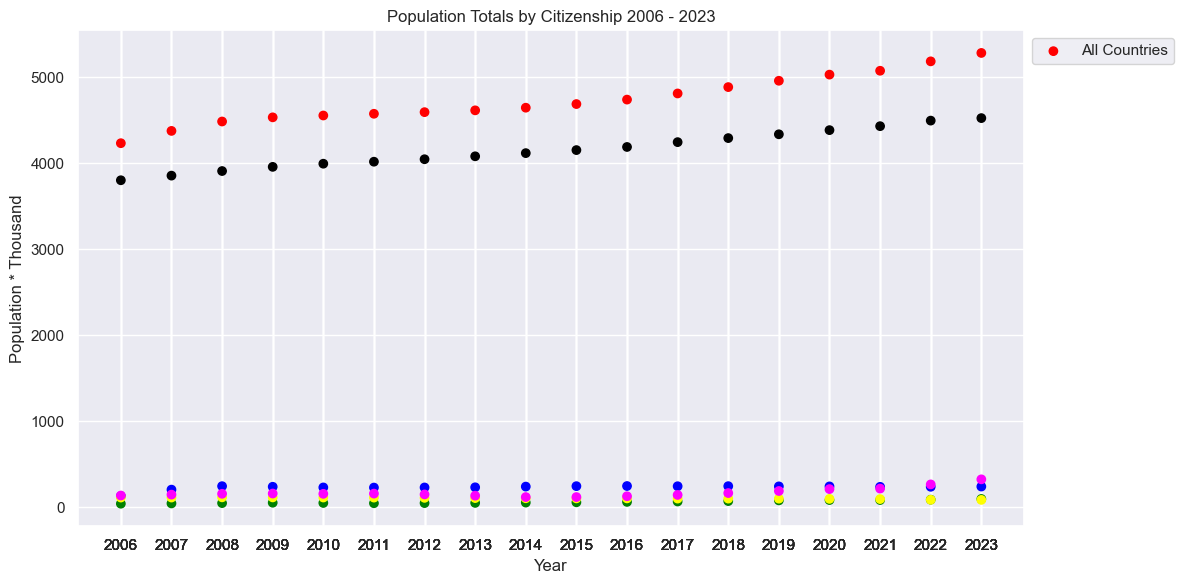

In [24]:
df_both_sex_values = df_all_data.loc[df_all_data["Gender"] != 'Male']
df_both_sex_values = df_both_sex_values.loc[df_both_sex_values["Gender"] != 'Female']

plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True
x = df_both_sex_values["Year"]
y = df_both_sex_values["VALUE"]
colors = {'All Countries':'red', 'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)':'green', 'EU15 to EU27 (accession countries joined post 2004)':'blue'
        , 'United Kingdom':'yellow', 'Ireland':'black', 'All countries excluding Ireland,United Kingdom and EU272020':'magenta'}

plt.title('Population Totals by Citizenship 2006 - 2023')
plt.scatter(x, y, c=df_both_sex_values["Citizenship"].map(colors))
plt.xticks(x)
plt.xlabel("Year")
plt.ylabel("Population * Thousand")
plt.legend(['All Countries', 'EU14 excl Irl', "EU15 to EU27" , "UK","Ireland" , "All countries excl Ireland, UK and EU27"], bbox_to_anchor = (1 , 1))
plt.show()